### **CIFAR-10 Dataset**  

https://www.cs.toronto.edu/~kriz/cifar.html
  
우선 CIFAR-10 dataset은 32 * 32 픽셀의 컬러 이미지로 50000개는 학습 데이터 10000개는 테스트 데이터로 구성되었으며 10개의 클래스로 labeling 되어있다.

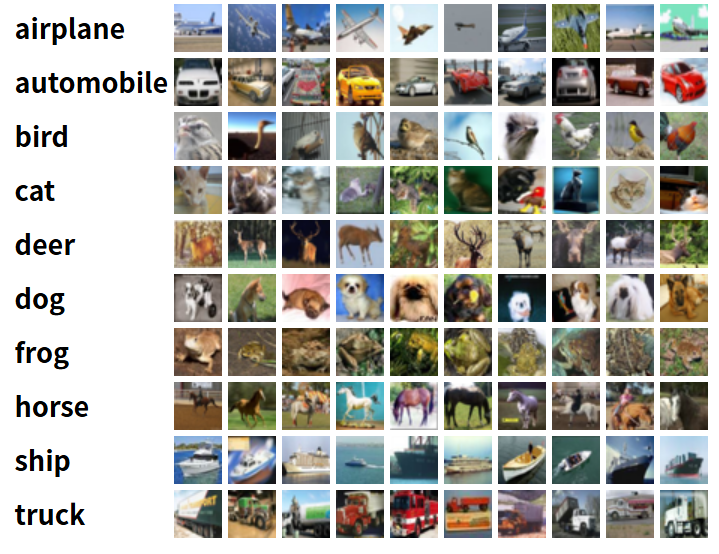

In [ ]:
%%time
##############################################################
# 16-2 CIFAR : Simple 코드 (1분 소요)
#  Test Accuracy: 0.8930
# CPU times: total: 2min 31s
# Wall time: 40.8 s
##############################################################
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

## CIFAR-10 데이터 불러오기
# cifar10 = tf.keras.datasets.fashion_mnistc
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 422s 2us/step
CPU times: total: 17.8 s
Wall time: 7min 15s


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
X_test[10].shape

(32, 32, 3)

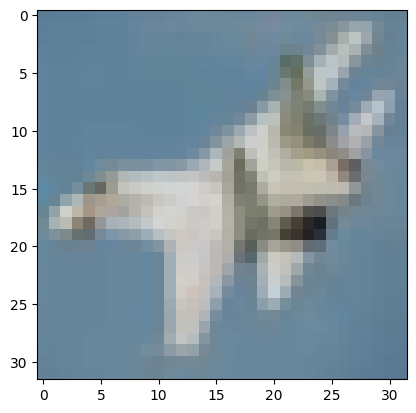

In [ ]:
plt.imshow(X_test[10])

In [4]:
cifar10_labels = [
    'airplane',    # 0
    'automobile',  # 1
    'bird',        # 2
    'cat',         # 3
    'deer',        # 4
    'dog',         # 5
    'frog',        # 6
    'horse',       # 7
    'ship',        # 8
    'truck'        # 9
]

In [5]:
y_train[0][0]

np.uint8(6)

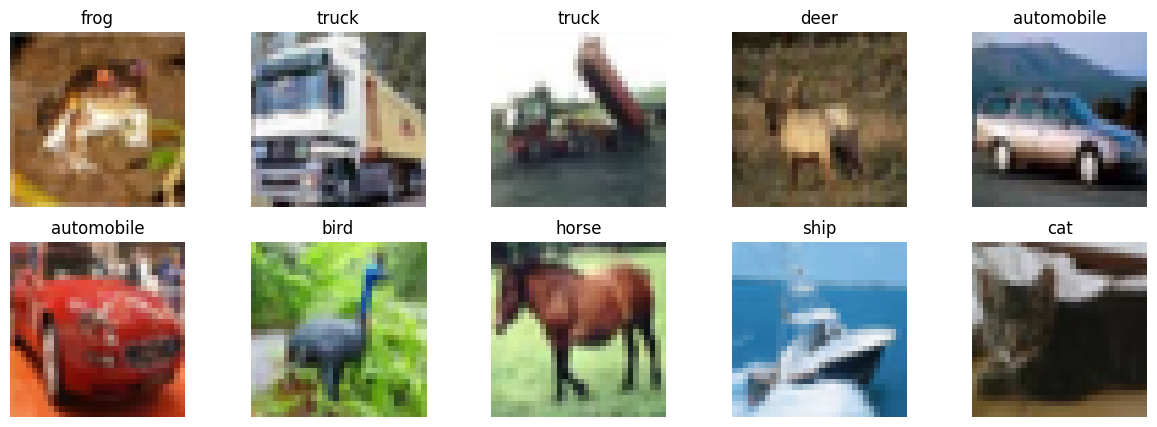

In [6]:
### cifar10 dataset 
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    # plt.title(y_train[i])
    plt.title(cifar10_labels[y_train[i][0]])
    plt.axis('off')

plt.show()

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
## Min_max 정규화
X_train_pre = X_train.astype('float32') / 255.
X_test_pre = X_test.astype('float32') / 255.
X_train_pre[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [9]:
tf.keras.utils.to_categorical(y_train).shape

(50000, 10)

In [10]:
tf.keras.utils.to_categorical(y_train, num_classes=10)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(50000, 10))

In [11]:
# One-Hot
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)
y_train_onehot.shape

(50000, 10)

In [12]:
32*32

1024

In [13]:
%%time
##############################################################
# CIFAR Dataset : Multi Class Classification
##############################################################
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 1. 데이터 불러오기 및 전처리
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train_pre = X_train.astype('float32') / 255.0
X_test_pre  = X_test.astype('float32') / 255.0

y_train_onehot = to_categorical(y_train, 10)
y_test_onehot  = to_categorical(y_test, 10)

# 2. 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

# 3. 콜백 함수 정의
early_stopping =  EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
model_chkpoint = ModelCheckpoint('best_cifar10_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 학습
history = model.fit(
    X_train_pre, y_train_onehot,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, model_chkpoint]
)


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2771 - loss: 1.9254
Epoch 1: val_loss improved from None to 1.33009, saving model to best_cifar10_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.3683 - loss: 1.7065 - val_accuracy: 0.5136 - val_loss: 1.3301
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5111 - loss: 1.3612
Epoch 2: val_loss improved from 1.33009 to 1.14505, saving model to best_cifar10_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.5281 - loss: 1.3183 - val_accuracy: 0.6004 - val_loss: 1.1450
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5866 - loss: 1.1795
Epoch 3: val_loss improved from 1.14505 to 0.96096, saving model to best_cifar10_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.5953 - loss: 1.1472 - val_accuracy: 0.6630 - val_loss: 0.9610
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6374 - loss: 1.0346
Epoch 4: val_loss i

In [14]:

# 6. 모델 평가
test_loss, test_acc = model.evaluate(X_test_pre, y_test_onehot, verbose=2)
print(f"\n테스트 정확도: {test_acc:.4f}")


313/313 - 3s - 9ms/step - accuracy: 0.7410 - loss: 0.7717

테스트 정확도: 0.7410


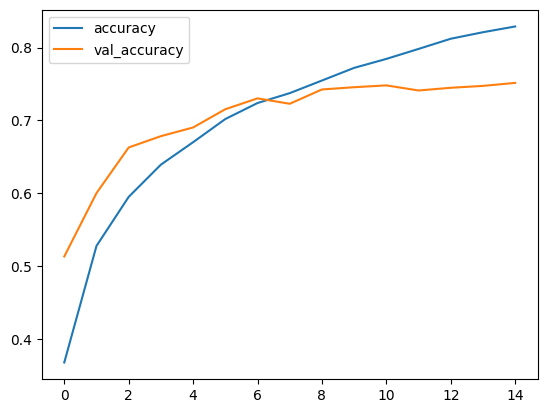

In [15]:
import pandas as pd
pd.DataFrame(history.history)[['accuracy' , 'val_accuracy']].plot()
plt.show()

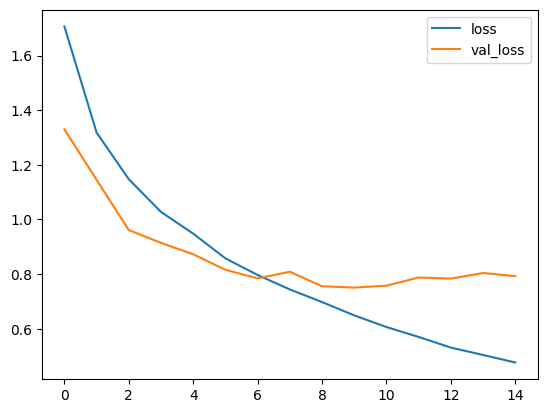

In [16]:
pd.DataFrame(history.history)[['loss' , 'val_loss']].plot()
plt.show()

In [17]:
model.predict(X_test[:10]).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


array([5, 1, 0, 0, 1, 9, 1, 9, 3, 1])

In [18]:
y_test[:10].flatten()

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [19]:
model.predict(X_test[0].reshape(-1, 32, 32, 3)).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


np.int64(5)

In [20]:
y_test[0][0]

np.uint8(3)

In [21]:
model.predict(X_test[0].reshape(-1, 32, 32, 3), verbose=0).argmax(axis=1)[0]

np.int64(5)

In [22]:
y_test[0][0]

np.uint8(3)

In [23]:
X_test[i].shape

(32, 32, 3)

0 @@@ 오답 @@@
Y값 3. cat != 예측값 5. dog


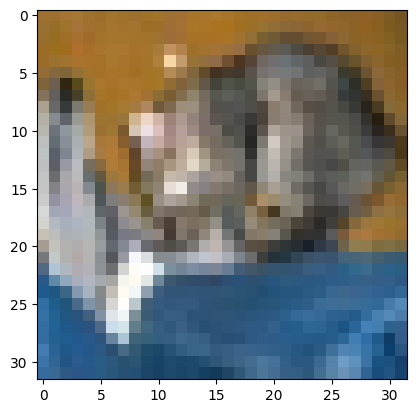

1 @@@ 오답 @@@
Y값 8. ship != 예측값 1. automobile


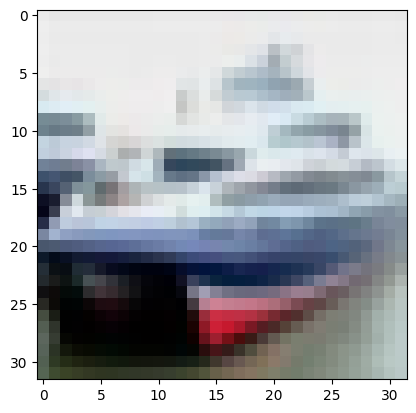

2 @@@ 오답 @@@
Y값 8. ship != 예측값 0. airplane


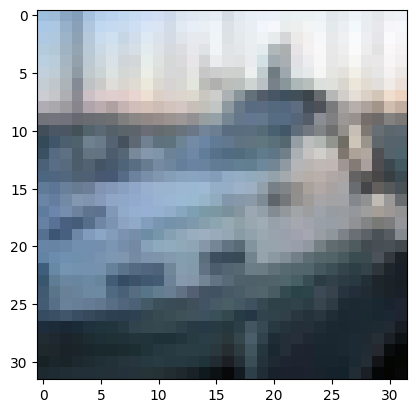

3 정답!
Y값 0. airplane != 예측값 0. airplane


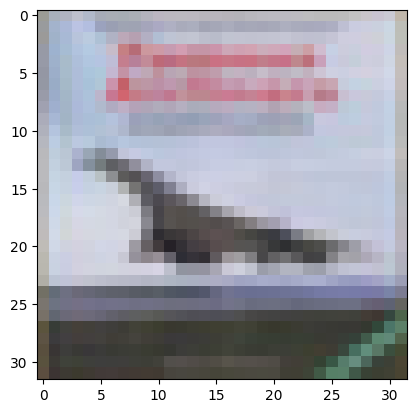

4 @@@ 오답 @@@
Y값 6. frog != 예측값 1. automobile


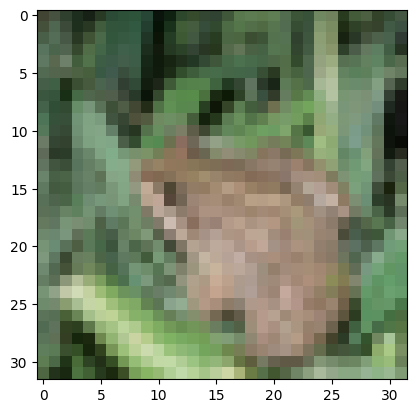

5 @@@ 오답 @@@
Y값 6. frog != 예측값 9. truck


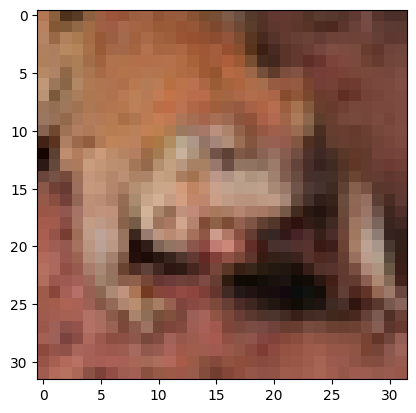

6 정답!
Y값 1. automobile != 예측값 1. automobile


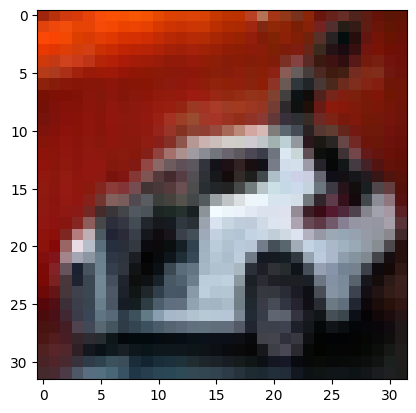

7 @@@ 오답 @@@
Y값 6. frog != 예측값 9. truck


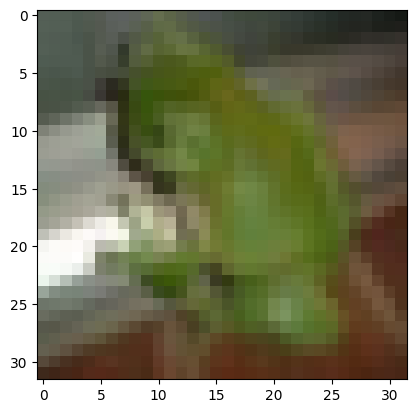

8 정답!
Y값 3. cat != 예측값 3. cat


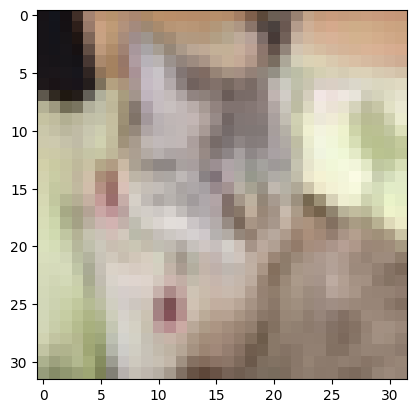

9 정답!
Y값 1. automobile != 예측값 1. automobile


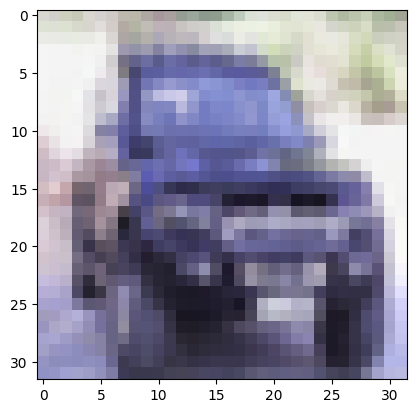

10 정답!
Y값 0. airplane != 예측값 0. airplane


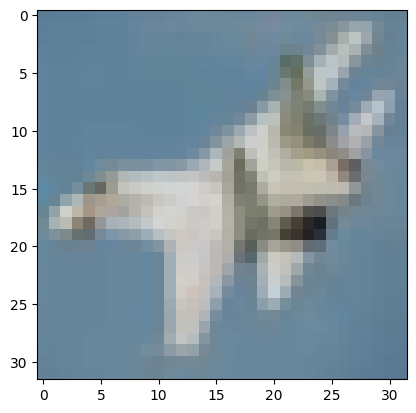

11 정답!
Y값 9. truck != 예측값 9. truck


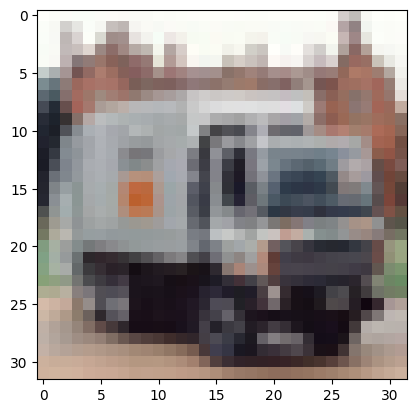

In [24]:
#############################################################
# Test data 중 오답 print
#############################################################
import matplotlib.pyplot as plt
cifar10_labels = [
    'airplane',    # 0
    'automobile',  # 1
    'bird',        # 2
    'cat',         # 3
    'deer',        # 4
    'dog',         # 5
    'frog',        # 6
    'horse',       # 7
    'ship',        # 8
    'truck'        # 9
]
for i in range(len(X_test)):
    predicted = model.predict(X_test[i].reshape(-1, 32, 32, 3), verbose=0).argmax(axis=1)[0]
    if y_test[i][0] == predicted:
        print(i, "정답!")
    else:
        print(i, "@@@ 오답 @@@")
    print(f"Y값 {y_test[i][0]}. {cifar10_labels[y_test[i][0]]}" +
            f" != 예측값 {predicted}. {cifar10_labels[predicted]}")
    plt.imshow(X_test[i]) 
    plt.show() 
    print("============================================================")
    if i > 10 :
        break